[Index](https://github.com/basilhan/math/blob/master/README.md)

## The Sigmoid Function

#### Other Names
Logistic sigmoid function  
Logistic function  
Inverse logit function  

#### The General Form

The general form of the sigmoid function $\sigma$ (as a function of $x$) used in machine learning is as follows.

$$
\sigma = 
\frac{1}{1 + e^{-(b + wx)}}
\tag{1}
$$

The values $w$ (weight) and $b$ (bias) are parameters which affect the shape and position of the function.  
Below is an implementation in Python.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
%matplotlib inline
plt.style.use('seaborn-whitegrid')

def sigmoid(x, w, b):
    return 1 / (1 + np.exp(-(b + (w*x))))

x = np.arange(-10., 10., 0.2)

#### Basic Shape
Let us plot out the function with unit weight and zero bias.

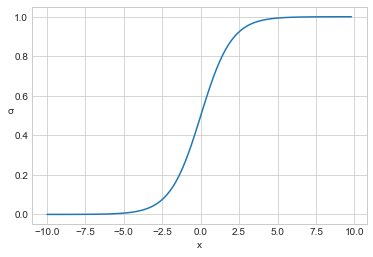

In [2]:
plt.plot(x, sigmoid(x, 1, 0))
plt.xlabel("x")
plt.ylabel("σ", rotation=0)
plt.show()

We can observe that :  
<p style="margin-left: 20px">
As $x \rightarrow -\infty$, $\sigma \rightarrow 0$.  
As $x \rightarrow +\infty$, $\sigma \rightarrow 1$.  
When $x = 0$, $\sigma = 0.5$.  
</p>  
Therefore, $\sigma$ is always in the range $[0,1]$.  
Differentiating $\sigma$ w.r.t. $x$ yields an interesting result.

\begin{align*}
\frac{d\sigma}{dx} &= \frac{d}{dx} (\frac{1}{1 + e^{-(b + wx)}}) \\
&= \frac{d}{dx} (1 + e^{-(b + wx)})^{-1} \\
&= (-1) \cdot (1 + e^{-(b + wx)})^{-2} \cdot e^{-(b + wx)} \cdot (-w) \\
&= \frac{1}{(1 + e^{-(b + wx)})^{2}} \cdot e^{-(b + wx)} \cdot w \\
&= \frac{1}{1+e^{-(b + wx)}} \bigg(\frac{1+e^{-(b + wx)}-1}{1+e^{-(b + wx)}} \bigg) w \\
&= \frac{1}{1+e^{-(b + wx)}} \bigg(1 - \frac{1}{1+e^{-(b + wx)}} \bigg) w \\
&= \sigma(1-\sigma)w
\end{align*}

Let us plot out the sigmoid function again with the derivative overlaid.

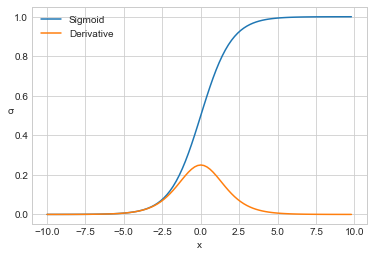

In [3]:
plt.plot(x, sigmoid(x, 1, 0), label="Sigmoid")
plt.plot(x, sigmoid(x, 1, 0)*(1-sigmoid(x, 1, 0)), label="Derivative")
plt.legend()
plt.xlabel("x")
plt.ylabel("σ", rotation=0)
plt.show()

As expected, there is a maximum gradient at $x = 0$ which is equal to a quarter of the weight. The gradient is also symmetrical about the line $x = 0$.  
Since the gradient is proportional to the weight, we would expect the sigmoid curve to have a sharper transition for larger values of weight. Let us study the effects of different weights and biases next.

#### Varying the Weights and Bias

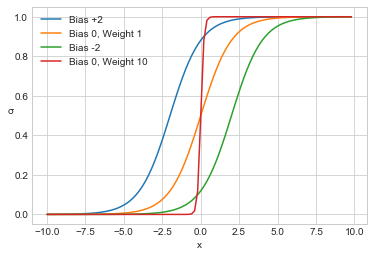

In [4]:
plt.plot(x, sigmoid(x, 1, 2), label="Bias +2")
plt.plot(x, sigmoid(x, 1, 0), label="Bias 0, Weight 1")
plt.plot(x, sigmoid(x, 1,-2), label="Bias -2")
plt.plot(x, sigmoid(x, 10, 0), label="Bias 0, Weight 10")
plt.legend()
plt.xlabel("x")
plt.ylabel("σ", rotation=0)
plt.show()

Indeed, the plot shows the expected sharper transition with increased weight.  
We see that for positive bias, the curve shifts to the left and vice versa. In terms of language, we can remember that increasing the bias leads to earlier activation (i.e. $\sigma$ reaches 1 faster).  

While it may not be obvious, the weight has a direct effect on the orientation of the curve. Plotting the function in higher dimensions make this clearer. We do this for the following 2-dimensional function.

$$
\sigma = 
\frac{1}{1 + e^{-(b + w_{1}x_1 + w_2x_2)}}
$$

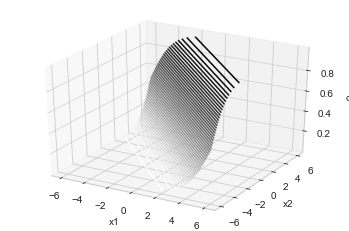

In [5]:
def sigmoid_2d(x1, x2, b, w1, w2):
    return 1 / (1 + np.exp(-(b + (w1*x1)+(w2*x2))))

x1 = np.linspace(-6, 6, 30)
x2 = np.linspace(-6, 6, 30)
X1, X2 = np.meshgrid(x1, x2)
σ = sigmoid_2d(X1, X2, 0, 1, 1)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X1, X2, σ, 50, cmap='binary')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('σ');

With unit weights in both dimensions and zero bias, we see a 2-dimensional surface orientated at 45$^{\circ}$ to the $x_1$-$x_2$ axes. Suppose we increase the weight for $x_2$ to 3?

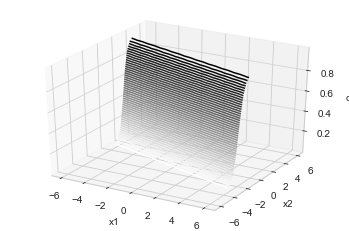

In [6]:
x1 = np.linspace(-6, 6, 30)
x2 = np.linspace(-6, 6, 30)
X1, X2 = np.meshgrid(x1, x2)
σ = sigmoid_2d(X1, X2, 0, 1, 3)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X1, X2, σ, 50, cmap='binary')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('σ');

The surface appears to be rotated slightly counter clockwise from this vantage point. This is to be expected since the effect of the increased weight is a "squashing" of the curve along the $x_2$ dimension. Continuing, what happens if we increase the bias to +10?

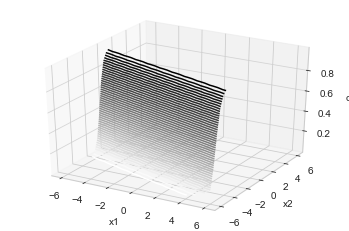

In [7]:
x1 = np.linspace(-6, 6, 30)
x2 = np.linspace(-6, 6, 30)
X1, X2 = np.meshgrid(x1, x2)
σ = sigmoid_2d(X1, X2, 10, 1, 3)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X1, X2, σ, 50, cmap='binary')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('σ');

The curve shifts, without change in orientation, in a way that cedes more of the space to the positive outcome.

#### Summary
* The sigmoid function always returns a value in the range $[0,1]$.
* The transition from 0 to 1 is smooth with maximum gradient when the function value is 0.5.
* The sharpness of the transition is controlled by the weight parameter, being directly proportional to it.
* The weight parameter also has the effect of changing the orientation of the curve.
* The bias parameter shifts the curve along the x-axis. Positive bias shifts left and vice versa.

Permalink : https://nbviewer.jupyter.org/github/basilhan/math/blob/master/PythonSigmoid.ipynb